In [1]:
import pandas as pd
import numpy as np
from os import path, listdir
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

import zipfile, simplejson

root_path = "/home/jhahn/Goldencheetah/activities"
data_path = path.join(root_path, "json")
plot_path = path.join(root_path, "plots")

l_files = listdir(data_path)

def read_data(do_plot_hists=False):
    d_results = dict()

    for ff in l_files:
        filepath_ = path.join(data_path, ff)
        print("{}".format(filepath_))

        with open(filepath_) as jfile:
            j_data = simplejson.load(jfile, encoding="ISO-8859-1")

        try:
            df_data = pd.DataFrame.from_dict(j_data["RIDE"]["SAMPLES"])
            df_data = df_data.rolling(60, win_type="hamming").mean()
        except:
            continue

        if "WATTS" not in df_data.columns:
            print("WATTS not found")
            continue

        if ('HR' not in df_data.columns):
            print("HR not found")
            continue

        H, idx_watts, idx_hr = np.histogram2d(df_data['WATTS'], df_data['HR'], range=((0, 1000), (0, 190)), bins=(200, 190))

        p_w_h = H / (1e-15 + H.sum(axis=0))
        # e_wh__ = idx_watts[:-1].dot(H) / len(idx_watts)

        e_wh = idx_watts[:-1].dot(p_w_h)

        d_results[ff] = e_wh

        if do_plot_hists:
            var_wh = np.zeros((len(idx_hr), 1))
            for i_w, w in enumerate(idx_watts[:-1]):
                for i_h, h in enumerate(idx_hr[:-1]):
                    var_wh[i_h] += (w-e_wh[i_h])**2 * p_w_h[i_w,i_h]

            print("Plotting mean")
            plt.plot(e_wh)
            plt.ylim([0, 1000])
            #plt.show()
            plt.savefig(path.join(plot_path, "mean_" + ff[:-4] + "png"))
            plt.close()

            plt.plot(var_wh)
            #plt.show()
            plt.savefig(path.join(plot_path, "var_" + ff[:-4] + "png"))
            plt.close()
            # power_pulse_std = H.std(axis=1)

            if ('HR' in df_data.columns) and ('WATTS' in df_data.columns):
                plt.hist2d(df_data['WATTS'], df_data['HR'], range=((0, 1000), (0, 190)), bins=(200, 190))
                plt.xlabel('WATTS')
                plt.ylabel('HR')
                #plt.show()
                plt.savefig(path.join(plot_path, ff[:-4] + 'png'))

                plt.close()
    
    with open(path.join(plot_path, 'data.pkl'), 'wb') as f_data:
        pickle.dump({'data': d_results, 'index_hr':idx_hr}, f_data)

In [2]:
read_data()

/home/jhahn/Goldencheetah/activities/json/2017_10_17_19_33_20.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2017_09_26_17_49_42.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_12_13_18_31_15.json
/home/jhahn/Goldencheetah/activities/json/2018_02_23_16_35_32.json
/home/jhahn/Goldencheetah/activities/json/2017_10_28_08_56_06.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_10_05_16_46_14.json
/home/jhahn/Goldencheetah/activities/json/2017_08_13_09_25_11.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_02_21_22_21_02.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_05_20_08_04_28.json
/home/jhahn/Goldencheetah/activities/json/2018_08_23_17_50_31.json
/home/jhahn/Goldencheetah/activities/json/2018_03_11_12_36_40.json
/home/jhahn/Goldencheetah/activities/json/2018_07_19_17_46_01.json
/home/jhahn/Goldencheetah/activities/json/2018_07_07_09_16_06.json
/home/jhahn/Goldencheetah/activities/json/2018_05

WATTS not found
/home/jhahn/Goldencheetah/activities/json/2017_09_22_16_38_39.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_08_21_17_45_44.json
/home/jhahn/Goldencheetah/activities/json/2018_05_01_10_26_10.json
/home/jhahn/Goldencheetah/activities/json/2018_05_04_18_04_18.json
/home/jhahn/Goldencheetah/activities/json/2018_06_21_17_43_54.json
/home/jhahn/Goldencheetah/activities/json/2018_09_23_12_42_15.json
/home/jhahn/Goldencheetah/activities/json/2018_04_03_17_52_07.json
/home/jhahn/Goldencheetah/activities/json/2019_04_18_08_35_02.json
/home/jhahn/Goldencheetah/activities/json/2018_01_01_14_58_21.json
/home/jhahn/Goldencheetah/activities/json/2019_04_17_10_32_57.json
/home/jhahn/Goldencheetah/activities/json/2018_04_11_17_37_14.json
/home/jhahn/Goldencheetah/activities/json/2018_06_07_17_47_53.json
/home/jhahn/Goldencheetah/activities/json/2017_08_27_14_58_16.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2017_09_16_09_36_26.json
WATTS not foun

/home/jhahn/Goldencheetah/activities/json/2018_08_12_19_27_23.json
/home/jhahn/Goldencheetah/activities/json/2018_09_14_08_40_45.json
/home/jhahn/Goldencheetah/activities/json/2019_01_05_12_52_29.json
/home/jhahn/Goldencheetah/activities/json/2018_08_11_12_14_00.json
/home/jhahn/Goldencheetah/activities/json/2018_05_26_12_58_01.json
/home/jhahn/Goldencheetah/activities/json/2018_07_28_14_21_19.json
/home/jhahn/Goldencheetah/activities/json/2018_12_24_11_09_28.json
/home/jhahn/Goldencheetah/activities/json/2018_09_13_08_54_58.json
/home/jhahn/Goldencheetah/activities/json/2018_01_05_19_52_47.json
/home/jhahn/Goldencheetah/activities/json/2018_06_28_17_46_56.json
/home/jhahn/Goldencheetah/activities/json/2018_01_21_08_46_05.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2017_09_24_10_34_20.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2017_12_24_08_55_19.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_12_13_18_22_35.json
/home/jhahn/Go

/home/jhahn/Goldencheetah/activities/json/2017_10_22_08_39_03.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_03_03_07_27_15.json
/home/jhahn/Goldencheetah/activities/json/2018_06_06_18_53_51.json
/home/jhahn/Goldencheetah/activities/json/2018_03_10_13_28_48.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2017_10_13_17_02_07.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_08_07_17_44_55.json
/home/jhahn/Goldencheetah/activities/json/2018_09_05_17_49_46.json
/home/jhahn/Goldencheetah/activities/json/2017_09_23_10_22_22.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_08_03_18_33_26.json
/home/jhahn/Goldencheetah/activities/json/2017_10_07_09_31_00.json
WATTS not found
/home/jhahn/Goldencheetah/activities/json/2018_05_03_17_43_25.json
/home/jhahn/Goldencheetah/activities/json/2017_12_02_14_55_59.json
/home/jhahn/Goldencheetah/activities/json/2018_05_10_14_27_01.json
HR not found
/home/jhahn/Goldencheetah/activities

In [3]:
with open(path.join(plot_path, 'data.pkl'), 'rb') as f_data:
    data = pickle.load(f_data)
d_results = data['data']
idx_hr = data['index_hr']

<IPython.core.display.Javascript object>


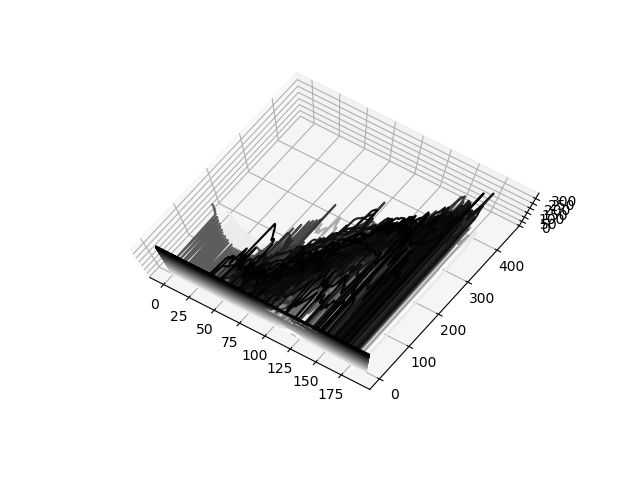

2018_12_13_18_31_15.json
2018_02_23_16_35_32.json
2018_10_05_16_46_14.json
2018_05_20_08_04_28.json
2018_08_23_17_50_31.json
2018_03_11_12_36_40.json
2018_07_19_17_46_01.json
2018_07_07_09_16_06.json
2018_05_08_18_59_06.json
2018_09_17_17_14_36.json
2018_07_15_17_57_28.json
2018_08_12_08_56_49.json
2017_11_18_08_30_29.json
2018_10_27_14_09_00.json
2018_04_15_13_55_12.json
2017_12_10_13_27_09.json
2018_06_13_18_44_14.json
2018_02_11_10_15_16.json
2018_03_25_10_22_34.json
2019_04_06_10_06_20.json
2018_02_13_19_42_18.json
2019_04_16_09_37_28.json
2017_12_17_11_08_35.json
2018_08_01_17_44_02.json
2018_07_04_18_02_15.json
2018_02_18_09_11_35.json
2018_01_30_18_51_56.json
2018_12_26_09_52_09.json
2018_12_08_08_23_44.json
2018_08_26_09_02_36.json
2018_09_12_10_47_30.json
2018_01_11_20_14_53.json
2018_06_17_06_26_32.json
2019_04_14_09_36_50.json
2018_11_18_10_20_14.json
2018_03_30_16_05_26.json
2018_06_26_17_57_06.json
2019_01_26_12_50_56.json
2018_03_26_13_02_43.json
2018_03_23_09_00_56.json


In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for ii, key in enumerate(d_results.keys()):
    print("{}".format(key))
    
    color = 1-(ii+1)/(float(len(d_results))+1)
    ax.plot(idx_hr[:-1], d_results[key], zs=ii, color=[color, color, color])
    
plt.savefig(path.join(plot_path, "all_.png"))

In [5]:
df_data = pd.DataFrame(d_results).T
df_data.index = [i.replace('.json', '') for i in df_data.index]
df_data.index = pd.to_datetime(df_data.index, format='%Y_%m_%d_%H_%M_%S')
df_data.sort_index(inplace=True)

<IPython.core.display.Javascript object>


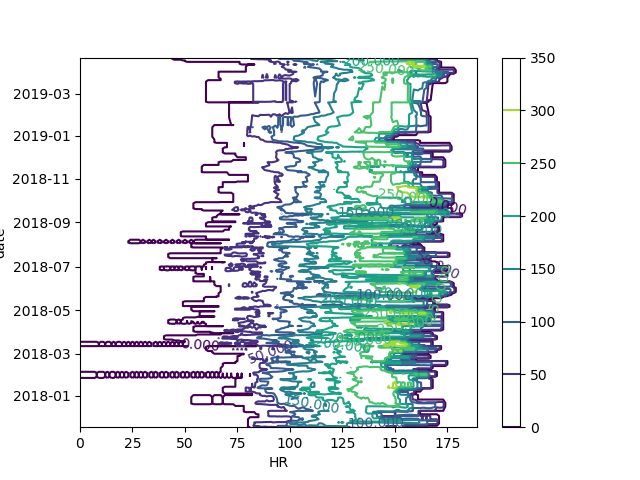

In [10]:
# X, Y = np.meshgrid(df_data.columns, range(len(df_data.index)))
X, Y = np.meshgrid(df_data.columns, df_data.index)

Z = df_data.copy().values

filter_len = 5

for ii in range(Z.shape[1]):
    Z[:,ii] = np.convolve(Z[:,ii], np.ones(filter_len) / float(filter_len), 'same')

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
plt.colorbar(CS)
plt.xlabel('HR')
plt.ylabel('date')
plt.show()

<IPython.core.display.Javascript object>


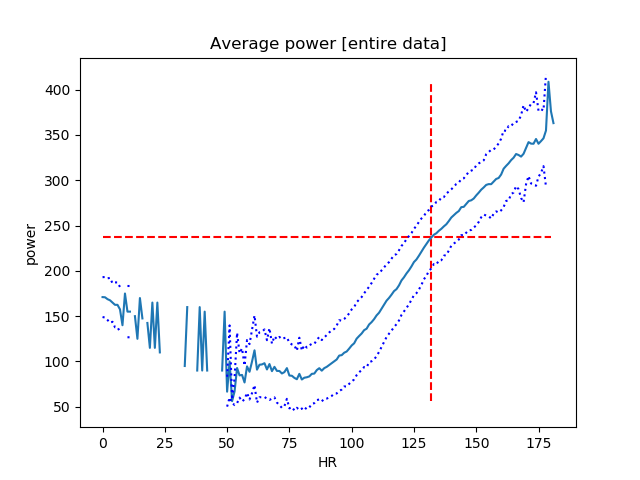

<IPython.core.display.Javascript object>


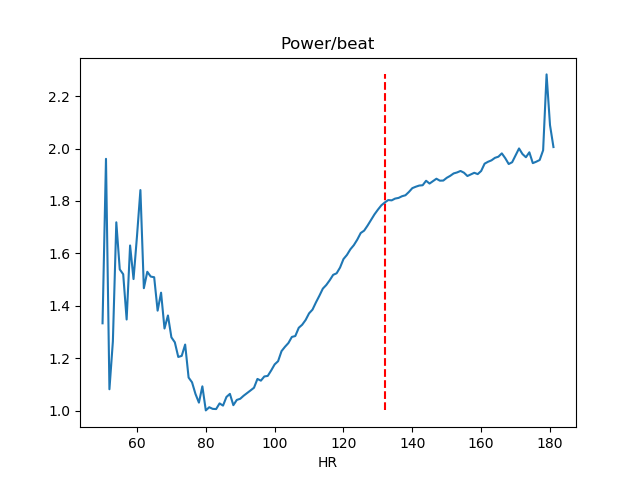

In [84]:
plt.figure()

Z_ = Z.copy()

filter_len = 5

s_mean = pd.Series(index=df_data.columns)
s_std =  pd.Series(index=df_data.columns)

threshold_power_min = 50

for col, s_data in df_data.items():# time
    s_mean[col] = s_data[s_data > threshold_power_min].mean()
    s_std[col] = s_data[s_data > threshold_power_min].std()

s_mean.plot()
(s_mean + s_std).plot(linestyle=':', color='b')
(s_mean - s_std).plot(linestyle=':', color='b')
plt.xlabel('HR')
plt.ylabel('power')
plt.title('Average power [entire data]')
plt.vlines(132, s_mean.min(), s_mean.max(), 'r', linestyle='--')
plt.hlines(237, 0, 180, 'r', linestyle ='--')

plt.figure()

s_power_per_beat = s_mean / s_mean.index

s_power_per_beat = s_power_per_beat[50:]
s_power_per_beat.plot()
plt.title('Power/beat')
plt.xlabel('HR')
plt.vlines(132, s_power_per_beat.min(), s_power_per_beat.max(), 'r', linestyle='--')
#plt.xlim([50, 190])

<IPython.core.display.Javascript object>


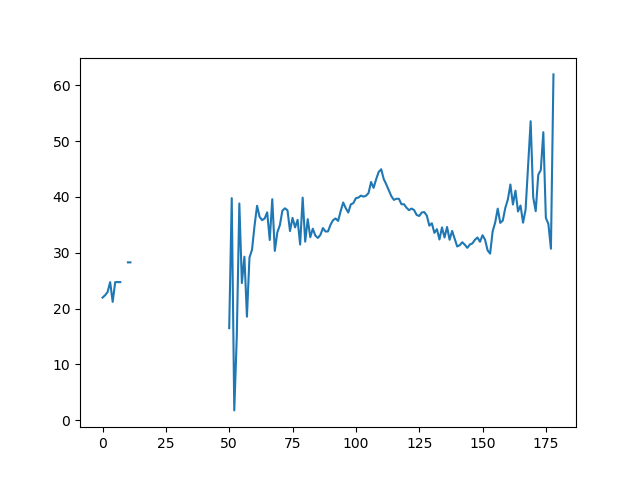

In [76]:
plt.figure()
s_std.plot()